In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import math 

import warnings
warnings.simplefilter("ignore")

This notebook digs into the details of gradient descent algorithem in OLS model and then compare the results with sklearn package

# Load data 

The data set is about transcation price of commercial real estate and its releated information

In [2]:
training = pd.read_csv("kc_house_train_data.csv")
print(training.shape)
training.head(3)

(17384, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062


In [3]:
training.columns

Index([u'id', u'date', u'price', u'bedrooms', u'bathrooms', u'sqft_living',
       u'sqft_lot', u'floors', u'waterfront', u'view', u'condition', u'grade',
       u'sqft_above', u'sqft_basement', u'yr_built', u'yr_renovated',
       u'zipcode', u'lat', u'long', u'sqft_living15', u'sqft_lot15'],
      dtype='object')

# OLS with sklearn package

In [4]:
# normalized the training data:
trained_features = training[["bedrooms", 'sqft_living', 'sqft_living15']]
scaler = StandardScaler()
scaler.fit((trained_features))
trained_features_scaled = scaler.transform(trained_features)
trained_features_scaled = pd.DataFrame(trained_features_scaled)

In [5]:
# sklearn's LinearRegression as comparison
learn_model = LinearRegression()
learn_model.fit(trained_features_scaled,training["price"])
print(learn_model.coef_)
print(learn_model.intercept_)

[-55667.49142952 263191.09866808  39094.57566696]
539366.6279337321


# Gradient descent

In [6]:
def comp_rss(y, y_hat):  
    rss = np.sum((y - y_hat)**2)
    return rss 
def comp_predict_y(x_matrix, weights):
    num_obser = x_matrix.shape[0]
    predict_y = np.ones(num_obser)
    for i in range(num_obser):
        predict_y[i] = np.dot(x_matrix[i].reshape(1,-1),np.array(weights).reshape(-1,1))
    return predict_y

In [7]:
def regression_gradient_descent(x_matrix, output, initial_weights, step_size, tolerance):
    num_obser = x_matrix.shape[0]
    num_features = x_matrix.shape[1]
    weights = initial_weights
    congerged = False
    gradient_magnitude_list = []
    
    while not congerged:
        predict_y = comp_predict_y(x_matrix, weights)
        rss = comp_rss(output, predict_y)
        gradient_sum_squares = 0
        for i in range(num_features):
            sum_term = np.dot((predict_y - output).reshape(1,-1), (x_matrix[:,i].reshape(-1,1)))
            weights[i] = weights[i] - 2* step_size * sum_term
            gradient_sum_squares = gradient_sum_squares + (2*sum_term)**2
        gradient_magnitude = math.sqrt(gradient_sum_squares)
        gradient_magnitude_list.append(gradient_magnitude)
        if gradient_magnitude < tolerance or len(gradient_magnitude_list) == 100:
            congerged = True
        
    return weights,gradient_magnitude_list

In [8]:
trained_features_scaled["constant"] = 1
x_matrix = np.array(trained_features_scaled)
output = np.array(training["price"])
tolerance = 1e6
initial_weights = [1, 1, 1, 1]
step_size = 0.00001
weight, gradient_magnitude_list = regression_gradient_descent(x_matrix, output, initial_weights, step_size, tolerance)
weight

[array([[-55635.25188209]]),
 array([[263099.35836971]]),
 array([[39165.63544664]]),
 array([[539366.62793373]])]

Similar coeffient as sklearn function, so it is appropriate to set 1e6 as tolerance

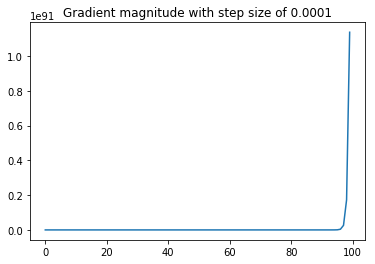

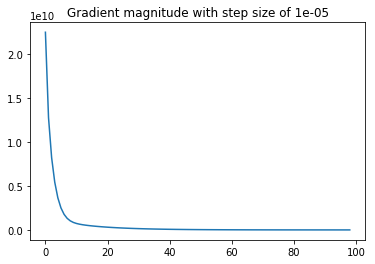

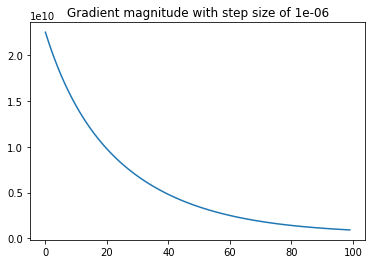

In [9]:
initial_weights = [1, 1, 1, 1]
step_size = 0.0001
weight, gradient_magnitude_list = regression_gradient_descent(x_matrix, output, initial_weights, step_size, tolerance)
gradient_magnitude_list
plt.plot(range(len(gradient_magnitude_list)), gradient_magnitude_list)
plt.title("Gradient magnitude with step size of " + str(step_size))
plt.show()

initial_weights = [1, 1, 1, 1]
step_size = 0.00001
weight, gradient_magnitude_list = regression_gradient_descent(x_matrix, output, initial_weights, step_size, tolerance)
gradient_magnitude_list
plt.plot(range(len(gradient_magnitude_list)),  gradient_magnitude_list)
plt.title("Gradient magnitude with step size of " + str(step_size))
plt.show()

initial_weights = [1, 1, 1, 1]
step_size = 0.000001
weight, gradient_magnitude_list = regression_gradient_descent(x_matrix, output, initial_weights, step_size, tolerance)
gradient_magnitude_list
plt.plot(range(len(gradient_magnitude_list)), gradient_magnitude_list)
plt.title("Gradient magnitude with step size of " + str(step_size))
plt.show()

We can see from the plots:
- The cost function will diverging and never reach the target point  if the step size is too large, eg 0.0001 in this case
- As the step size get smaller, the gradient descent funtion will reach the minimum grident point; However, if the step size is too smaller (eg 0.000001), it will need very long time to converge.